<a href="https://colab.research.google.com/github/nguyenhuuduong20062002/NguyenHuuDuong20104025/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/Money

/content/drive/MyDrive/Colab Notebooks/BTVN/Money


In [4]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Money/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 977 images belonging to 11 classes.


In [6]:
  # Tạo bộ dữ liệu validation
  validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Money/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 115 images belonging to 11 classes.


In [7]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '200d': 4,
 '20K': 5,
 '2K': 6,
 '500K': 7,
 '500d': 8,
 '50K': 9,
 '5K': 10}

In [8]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '200d': 4,
 '20K': 5,
 '2K': 6,
 '500K': 7,
 '500d': 8,
 '50K': 9,
 '5K': 10}

In [9]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [10]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 200 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=200,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/200
31/31 [==============================] - 173s 6s/step - loss: 3.6361 - accuracy: 0.0880 - val_loss: 2.3451 - val_accuracy: 0.1913
Epoch 2/200
31/31 [==============================] - 164s 5s/step - loss: 2.2440 - accuracy: 0.1699 - val_loss: 2.2728 - val_accuracy: 0.2435
Epoch 3/200
31/31 [==============================] - 165s 5s/step - loss: 2.0513 - accuracy: 0.2354 - val_loss: 2.1364 - val_accuracy: 0.2261
Epoch 4/200
31/31 [==============================] - 164s 5s/step - loss: 1.8749 - accuracy: 0.3101 - val_loss: 1.9967 - val_accuracy: 0.3043
Epoch 5/200
31/31 [==============================] - 163s 5s/step - loss: 1.6582 - accuracy: 0.3808 - val_loss: 1.8091 - val_accuracy: 0.3565
Epoch 6/200
31/31 [==============================] - 163s 5s/step - loss: 1.5799 - accuracy: 0.4074 - val_loss: 2.1259 - val_accuracy: 0.3130
Epoch 7/200
31/31 [==============================] - 162s 5s/step - loss: 1.5092 - accuracy: 0.4299 - val_loss: 1.7981 - val_accuracy: 0.3565
Epoch 

In [11]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.04667682573199272
Train Accuracy 0.9856704473495483


In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [21]:
# Lưu lại
model.save("MoneyMoney.h5")

In [14]:
# Tải mô hình 
model_CNN=load_model('MoneyMoney.h5')

1/1 [==============================] - 1s 777ms/step
NAM TRAM NGAN DONG


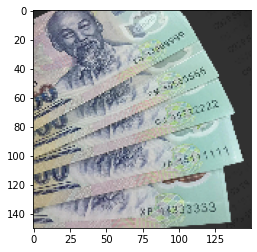

1/1 [==============================] - 0s 61ms/step
MOT TRAM NGAN DONG


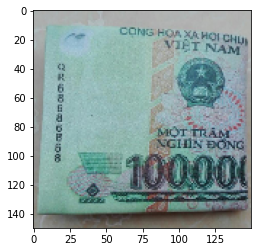

1/1 [==============================] - 0s 65ms/step
MOT TRAM NGAN DONG


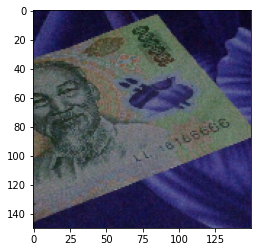

1/1 [==============================] - 0s 182ms/step
HAI TRAM NGAN DONG


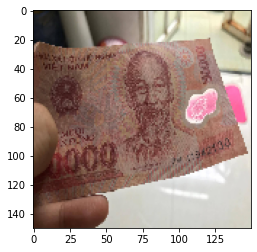

1/1 [==============================] - 0s 97ms/step
HAI CHUC NGAN DONG


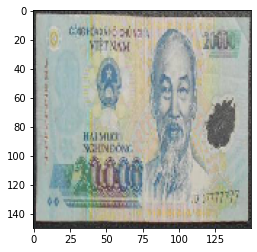

1/1 [==============================] - 0s 166ms/step
MUOI NGAN DONG


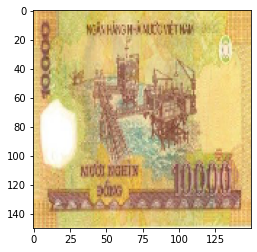

1/1 [==============================] - 0s 113ms/step
MUOI NGAN DONG


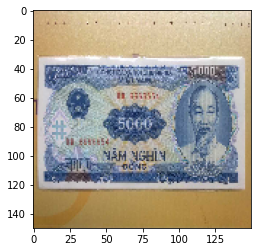

1/1 [==============================] - 0s 197ms/step
HAI NGAN DONG


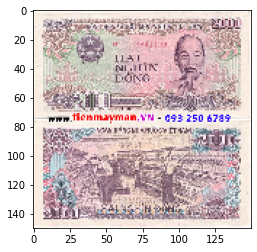

1/1 [==============================] - 0s 187ms/step
HAI NGAN DONG


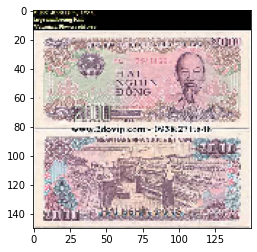

1/1 [==============================] - 0s 73ms/step
HAI TRAM DONG


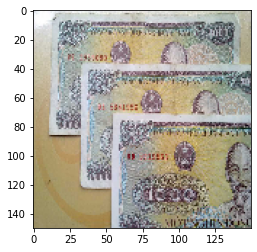

1/1 [==============================] - 0s 67ms/step
NAM TRAM DONG


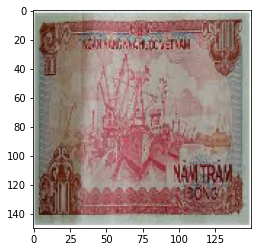

1/1 [==============================] - 0s 64ms/step
NAM TRAM DONG


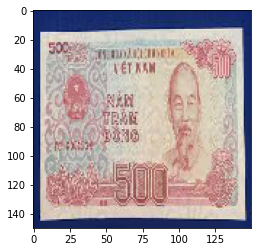

1/1 [==============================] - 0s 67ms/step
NAM NGAN DONG


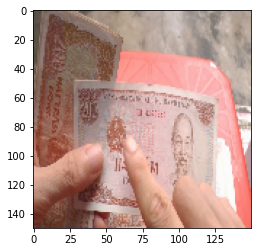

1/1 [==============================] - 0s 66ms/step
HAI TRAM DONG


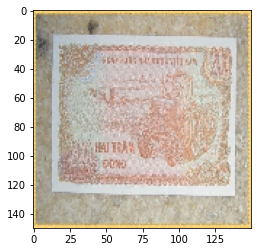

1/1 [==============================] - 0s 64ms/step
HAI TRAM NGAN DONG


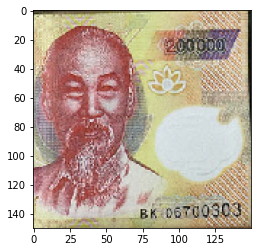

1/1 [==============================] - 0s 64ms/step
HAI CHUC NGAN DONG


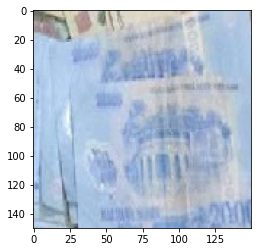

1/1 [==============================] - 0s 61ms/step
HAI CHUC NGAN DONG


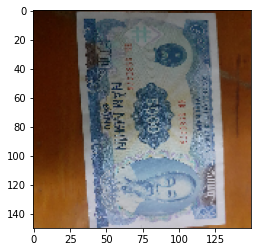

In [16]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/Money/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='MOT TRAM NGAN DONG'
  if round(result[0][1])==1:
    prediction='MUOI NGAN DONG'
  if round(result[0][2])==1:
    prediction='MOT NGAN DONG'
  if round(result[0][3])==1:
    prediction='HAI TRAM NGAN DONG'
  if round(result[0][4])==1:
    prediction='HAI TRAM DONG'
  if round(result[0][5])==1:
    prediction='HAI CHUC NGAN DONG'
  if round(result[0][6])==1:
    prediction='HAI NGAN DONG'
  if round(result[0][7])==1:
    prediction='NAM TRAM NGAN DONG'
  if round(result[0][8])==1:
    prediction='NAM TRAM DONG'
  if round(result[0][9])==1:
    prediction='NAM CHUC NGAN DONG'
  if round(result[0][9])==1:
    prediction='NAM NGAN DONG'
  print(prediction)
  plt.show()

In [29]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Money (1).ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Money (1).ipynb to html
[NbConvertApp] Writing 2555966 bytes to /content/drive/MyDrive/Money (1).html
